# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import Data

In [2]:
twitter_data = pd.read_csv(r"C:\Users\Dell\capstone project2\hate_sppech_detection\hatespeech.csv")

In [3]:
twitter_data.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


### number of rows and column

In [4]:
twitter_data.shape

(24783, 6)

In [5]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


### Check missing value

In [6]:
twitter_data.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

In [7]:
twitter_data.drop(['count','hate_speech_count','offensive_language_count','neither_count'],axis=1,inplace=True)

In [8]:
twitter_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
twitter_data['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

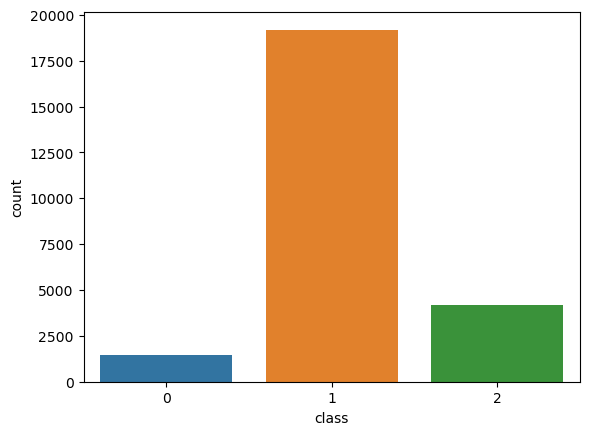

In [10]:
sns.countplot(twitter_data, x="class")

In [11]:
twitter_data[twitter_data['class']==0]['class'] = 1

C:\Users\Dell\AppData\Local\Temp\ipykernel_24564\2369566503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data[twitter_data['class']==0]['class'] = 1


In [12]:
twitter_data['class'].unique()

array([2, 1, 0], dtype=int64)

In [13]:
twitter_data["class"].replace({0: 1}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

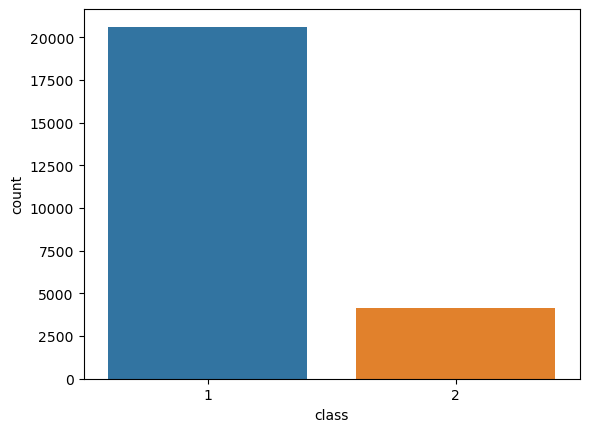

In [14]:
sns.countplot(twitter_data,x="class")

In [15]:
twitter_data[twitter_data['class']==0]

,class,tweet


In [16]:
twitter_data["class"].replace({2: 0}, inplace=True)

<Axes: xlabel='class', ylabel='count'>

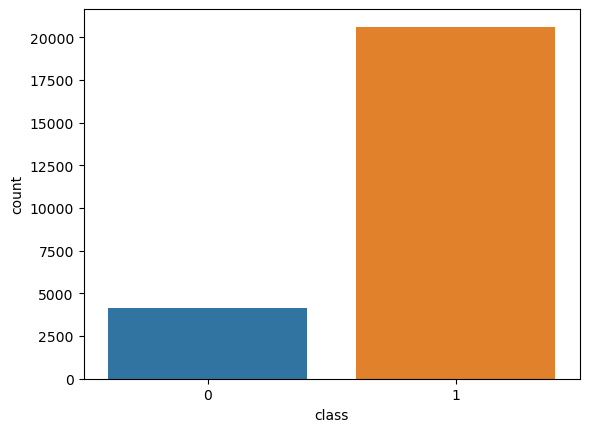

In [17]:
sns.countplot(twitter_data,x="class")

### handling imbalance data using under sampling

In [18]:
import imblearn

In [19]:
from collections import Counter

In [20]:
X = twitter_data.drop(["class"],axis=1)
y = twitter_data["class"]

In [21]:
from imblearn.under_sampling import RandomUnderSampler
rs = RandomUnderSampler(random_state=23)

print('Original dataset shape %s' % Counter(y))

X_res, y_res = rs.fit_resample(X,y)

print('After undersample dataset shape %s' %Counter(y_res))

Original dataset shape Counter({1: 20620, 0: 4163})
After undersample dataset shape Counter({0: 4163, 1: 4163})


# Stemming

In [22]:
port_stem = PorterStemmer()

In [23]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    
    return stemmed_content

In [24]:
twitter_data['stemmed_content'] = twitter_data['tweet'].apply(stemming)

In [25]:
twitter_data.head()

,class,tweet,stemmed_content
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabi life ever fuck ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva base look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...


In [26]:
X = np.array(X_res["tweet"])
Y = y_res.values

In [27]:
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Data Partition in train and test data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, stratify = Y, random_state=2) # statify = y means equal proposition of 0 and 1 in train and test

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(8326,) (6660,) (1666,)


# convert text data to numerical form

In [30]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Create Model

## Logistic Regression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

### Accuracy score on the training data

In [33]:
Train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train,Train_prediction)

In [34]:
print("acccuracy score of training data:",training_accuracy)

acccuracy score of training data: 0.9894894894894894


### Accuracy score on the testing data

In [35]:
test_prediction = model.predict(X_test)
test_accuracy = accuracy_score(Y_test,test_prediction)

In [36]:
print("acccuracy score of testing data:",test_accuracy)

acccuracy score of testing data: 0.9429771908763506


# Decision tree

In [37]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=150, #parent 
                                 max_depth=6)  #branches
#Train the model using the training sets
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=150)

## Training data accuracy

In [38]:
train_prediction_dt = dt.predict(X_train)  # MODEL = dt

In [39]:
matrix = confusion_matrix(Y_train,train_prediction_dt)
print(matrix)

[[3278   52]
 [ 628 2702]]


In [40]:
print(classification_report(Y_train,train_prediction_dt))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      3330
           1       0.98      0.81      0.89      3330

    accuracy                           0.90      6660
   macro avg       0.91      0.90      0.90      6660
weighted avg       0.91      0.90      0.90      6660



## Testing data Accuracy

In [41]:
test_prediction_dt = dt.predict(X_test)

In [42]:
matrix = confusion_matrix(Y_test,test_prediction_dt)
print(matrix)

[[821  12]
 [173 660]]


In [43]:
print(classification_report(Y_test,test_prediction_dt))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       833
           1       0.98      0.79      0.88       833

    accuracy                           0.89      1666
   macro avg       0.90      0.89      0.89      1666
weighted avg       0.90      0.89      0.89      1666



# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Random_Model = RandomForestClassifier(n_estimators=25, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Random_Model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=50, min_samples_split=100,
                       n_estimators=25)

## Performance metrics of training data

In [45]:
random_train_prediction = Random_Model.predict(X_train)

In [46]:
confusion_matrix = confusion_matrix(Y_train,random_train_prediction)
print(confusion_matrix)

[[1739 1591]
 [ 749 2581]]


In [47]:
print(classification_report(Y_train,random_train_prediction))

              precision    recall  f1-score   support

           0       0.70      0.52      0.60      3330
           1       0.62      0.78      0.69      3330

    accuracy                           0.65      6660
   macro avg       0.66      0.65      0.64      6660
weighted avg       0.66      0.65      0.64      6660



## Performance metrics of testing data

In [48]:
random_test_prediction = Random_Model.predict(X_test)

In [49]:
print(classification_report(Y_test,random_test_prediction))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       833
           1       0.61      0.79      0.69       833

    accuracy                           0.65      1666
   macro avg       0.66      0.65      0.64      1666
weighted avg       0.66      0.65      0.64      1666



# Interpretation

* here, accuracy of Decision tree is 90 % and accuracy of testing data is 89%. so , we choose decision tree because the diffrence between testing and training data accuracy is less it means error ratio is less.
* this is the good model.

# save the model

In [50]:
import pickle

In [52]:
pickle.dump(dt, open(r"C:\Users\Dell\capstone project2\hate_sppech_detection\build.pkl",'wb')) 